In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [129]:
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('climate_change_data.csv' , parse_dates= ['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10000 non-null  datetime64[ns]
 1   Location        10000 non-null  object        
 2   Country         10000 non-null  object        
 3   Temperature     10000 non-null  float64       
 4   CO2 Emissions   10000 non-null  float64       
 5   Sea Level Rise  10000 non-null  float64       
 6   Precipitation   10000 non-null  float64       
 7   Humidity        10000 non-null  float64       
 8   Wind Speed      10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


In [3]:
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day

In [4]:
data.reset_index(drop = True, inplace =True)
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4


In [5]:
data.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
Year              0
Month             0
Day               0
dtype: int64

In [6]:
data.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed', 'Year',
       'Month', 'Day'],
      dtype='object')

In [7]:
data.shape

(10000, 12)

#### 1. countries with Temperature below 10 and humidity below 23

In [8]:
temp_below10_hum_below23= data.query("Temperature<10.0 & Humidity<23.0")
temp_below10_hum_below23.sort_values(by='Temperature')
temp_below10_hum_below23

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day
17,2000-01-15 06:45:15.391539153,South Natalieshire,Libyan Arab Jamahiriya,2.228859,348.104272,-0.030618,64.636971,21.772004,46.228457,2000,1,15
23,2000-01-20 07:43:34.941494149,North Ericchester,Iceland,3.940121,352.760749,0.798083,1.999065,14.404548,8.346310,2000,1,20
29,2000-01-25 08:41:54.491449144,Williambury,Reunion,8.940555,398.027810,-0.733600,41.271330,7.689676,43.446416,2000,1,25
45,2000-02-07 19:17:26.624662466,North Ryan,Chad,9.026525,391.439582,0.135981,25.378106,17.504465,25.666674,2000,2,7
186,2000-06-05 06:08:06.048604860,Lake Stephanie,Brunei Darussalam,8.857165,449.045591,-1.501333,23.456643,4.284786,34.748730,2000,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9820,2022-08-02 14:59:56.759675904,Loriland,Norfolk Island,7.619604,426.948322,1.561985,64.136468,11.263066,5.285999,2022,8,2
9881,2022-09-22 20:52:55.517551744,Ericside,Israel,7.885149,454.200678,-1.346460,74.846339,12.328764,28.343956,2022,9,22
9902,2022-10-10 12:17:03.942394240,North Diana,Argentina,2.524144,370.842091,-0.665805,75.473619,19.133480,14.088713,2022,10,10
9940,2022-11-11 10:26:27.758775808,New Yolandamouth,Cape Verde,6.802565,421.771080,0.906843,1.872492,11.280543,8.985043,2022,11,11


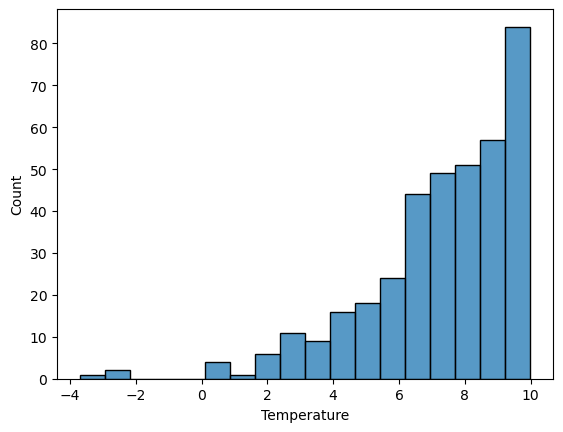

In [9]:
sns.histplot(data = temp_below10_hum_below23 , x = 'Temperature')
plt.show()

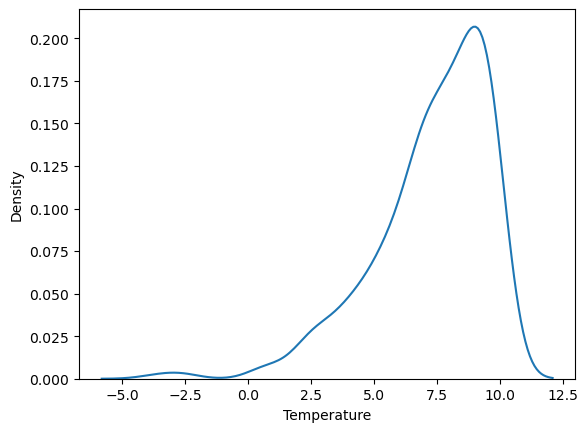

In [10]:
sns.kdeplot(data = temp_below10_hum_below23 , x = 'Temperature')
plt.show()

In [11]:
data.rename(columns= {'CO2 Emissions' : 'CO2_Emissions'} , inplace= True)
data.rename(columns= {'Sea Level Rise' : 'Sea_Level_Rise'}, inplace= True)
data.rename(columns= { 'Wind Speed' : 'Wind_Speed'}, inplace= True)
data.head()
#data.rename(columns= {'CO2 Emissions' : 'CO2_Emissions''Sea Level Rise' : 'Sea_Level_Rise','Wind Speed' : 'Wind_Speed'}, inplace=True)

,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4


##### Countries with highest carbon emissions

In [12]:
highestC_emission= data.sort_values( by = 'CO2_Emissions', ascending = True)
highestC_emission

,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day
9888,2022-09-28 18:00:58.325832576,Jenniferton,Kuwait,14.278908,182.131220,-0.510499,87.969080,77.646321,49.649592,2022,9,28
7016,2016-02-20 00:42:20.414041344,Johnsonview,Fiji,12.525616,222.104943,-2.879191,28.132118,23.922644,36.825630,2016,2,20
4322,2009-12-09 20:14:02.484248384,Gallagherland,Lithuania,21.255935,226.370250,0.140447,5.660576,84.815126,47.248525,2009,12,9
2703,2006-03-20 17:55:47.254725472,East Alex,United Arab Emirates,17.008439,239.630431,2.375032,59.725095,9.584496,4.335829,2006,3,20
956,2002-03-14 02:53:14.959495944,South Alejandra,Cook Islands,13.117074,241.219695,0.519779,90.154162,91.272687,24.454686,2002,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,2009-03-17 16:42:46.336633664,Thompsonside,South Georgia and the South Sandwich Islands,11.889589,572.692033,-0.555446,43.203866,28.957010,13.722237,2009,3,17
649,2001-06-29 05:08:54.653465344,Codymouth,Kenya,13.119809,575.653710,0.283735,67.114065,66.960886,13.998296,2001,6,29
3662,2008-06-03 09:18:11.989198912,Michaelshire,Afghanistan,14.972859,576.498970,1.912601,21.956058,18.119446,30.484797,2008,6,3
5886,2013-07-15 17:37:38.505850560,Phillipmouth,Reunion,16.371882,576.650885,1.326797,63.357124,51.850652,9.045268,2013,7,15


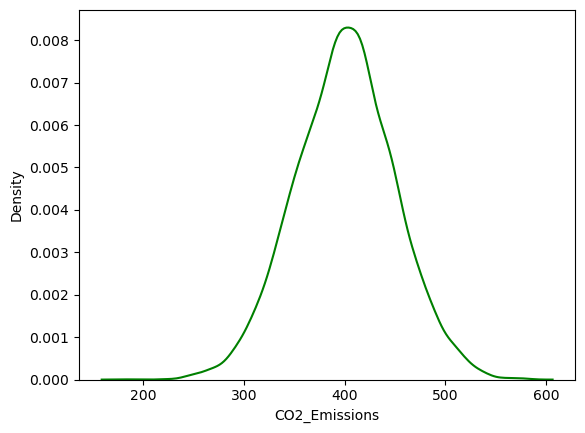

In [13]:
sns.kdeplot( data = highestC_emission , x = 'CO2_Emissions' , color = 'green')
plt.show()

#### countries with  humidity >96 and temperature less than 5

In [14]:
hum_high =  data.query (" Humidity >96.0 & Temperature <5.0 "  )
hum_high

,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day
618,2001-06-03 04:07:33.645364536,Wilsonbury,Central African Republic,2.862982,381.673382,-0.898517,43.181379,96.189860,26.004835,2001,6,3
3000,2006-11-25 06:02:54.977497728,South Brandonshire,Ecuador,3.567856,413.091149,1.105715,66.875291,98.266885,39.218759,2006,11,25
3028,2006-12-18 18:35:06.210621056,Harrisland,Belarus,0.855343,402.034579,-0.827064,42.097457,96.700467,0.186899,2006,12,18
4935,2011-05-08 19:32:59.837983744,New Rebecca,Malawi,4.402127,406.492053,0.554254,46.040325,97.972694,21.228397,2011,5,8
5300,2012-03-10 10:41:09.126912640,Gonzalezburgh,Malta,3.800965,409.089588,0.718271,72.322422,98.152348,9.229719,2012,3,10
5641,2012-12-21 21:56:00.216021568,South Anita,Antarctica (the territory South of 60 deg S),4.642315,282.731149,-1.751707,78.056419,97.600522,49.553230,2012,12,21
6186,2014-03-24 18:13:56.003600320,Josephstad,Djibouti,1.166684,406.867723,0.491823,60.862517,98.313746,40.147152,2014,3,24
6586,2015-02-23 19:02:19.333933376,South Erinland,Bahamas,4.704114,415.498440,0.988043,62.043768,97.966969,7.642240,2015,2,23
6770,2015-07-28 08:50:58.865886528,Stewartfurt,Honduras,4.434449,380.195185,-1.233361,88.405824,97.358933,4.974911,2015,7,28
8582,2019-09-27 14:25:22.952295168,East Angelaburgh,Mexico,2.339364,377.417980,0.433420,6.592108,98.846368,24.540125,2019,9,27


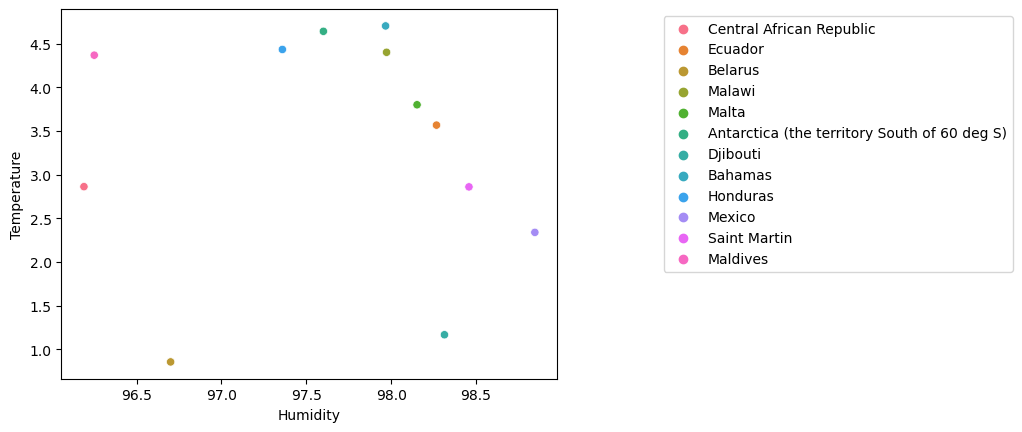

In [15]:
sns.scatterplot( data = hum_high , x = 'Humidity' , y ='Temperature' , hue = 'Country')
plt.legend(bbox_to_anchor = (1.2, 1))
plt.show()

In [70]:
India_climate = data.query (" Country == 'India' & Year >2005" )
indiaclimate = India_climate.drop( columns = ['Year','Month','Day'])
indiaclimate

,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed
2805,2006-06-14 10:27:19.603960384,Bowersfurt,India,15.702748,462.738893,-1.027062,67.324433,39.692066,27.317580
3217,2007-05-26 13:12:22.034203392,Aliciaview,India,17.222168,342.906534,-0.509245,62.577881,48.914960,28.376891
3403,2007-10-29 19:20:28.082808256,North Laurieside,India,15.904627,354.901698,1.164165,36.515595,80.880970,38.284059
3548,2008-02-28 14:50:00.540053984,Francisberg,India,19.211249,352.322940,-0.808938,99.328597,77.138614,3.989319
3555,2008-03-05 11:58:03.348334816,Masonfort,India,15.391247,449.799677,-0.924855,37.530240,80.239737,38.258343
4185,2009-08-16 18:02:16.093609344,Lake Sandrashire,India,18.342157,415.020313,0.815616,85.144267,91.182500,2.692060
4309,2009-11-28 22:07:40.126012608,Oliverside,India,11.243023,397.590335,-0.095128,64.807298,73.685582,4.906028
4358,2010-01-09 02:03:59.783978368,Payneville,India,15.647535,418.629962,1.021754,21.914709,93.764604,20.295536
5002,2011-07-04 02:24:18.145814528,Keithmouth,India,6.834645,445.085225,-0.480513,58.788707,61.433921,9.596664
5199,2011-12-16 14:19:20.036003584,Philipstad,India,18.756186,393.825370,-1.813955,82.425810,1.077511,45.380062


#### Climate change  in India after 2005

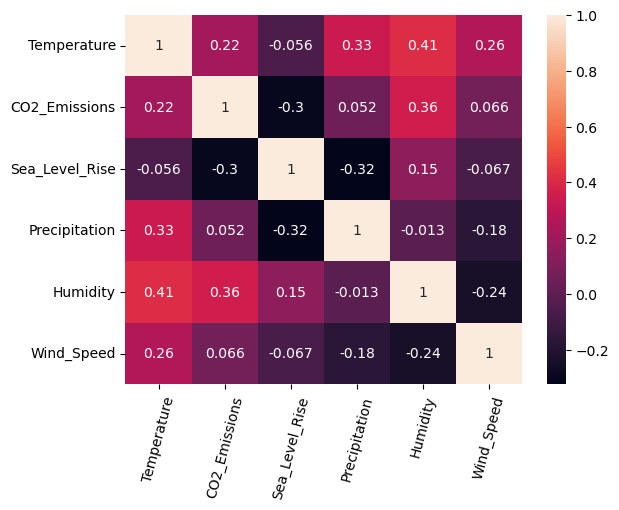

In [71]:
sns.heatmap(indiaclimate.corr(), annot=True )
plt.xticks(rotation = 75)
plt.show()

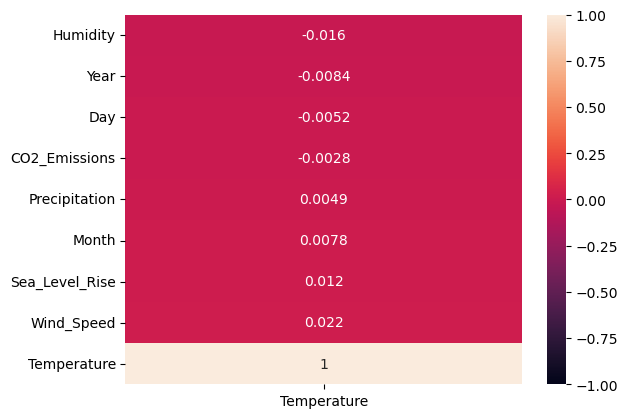

In [57]:
sns.heatmap(data.corr()[["Temperature"]].sort_values( by= 'Temperature'), vmax=1, vmin=-1, annot=True)
plt.plot();

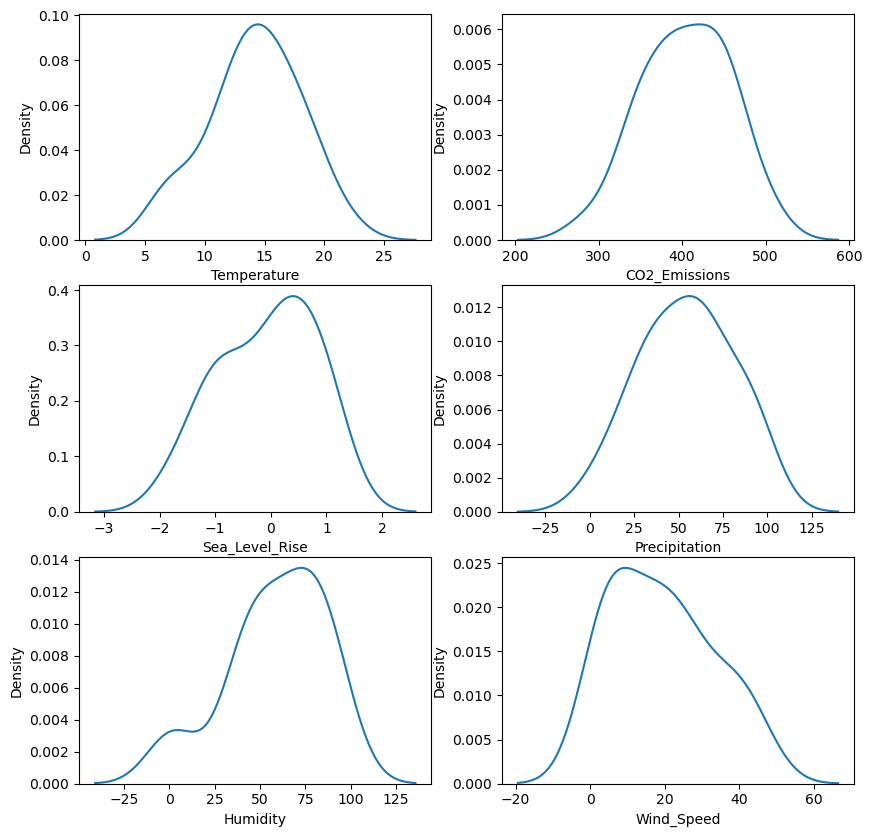

In [72]:
plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
sns.kdeplot(data = indiaclimate , x= 'Temperature' )

plt.subplot(3,2,2)
sns.kdeplot(data = indiaclimate , x= 'CO2_Emissions')

plt.subplot(3,2,3)
sns.kdeplot(data = indiaclimate , x = 'Sea_Level_Rise')
 
plt.subplot(3,2,4)
sns.kdeplot(data = indiaclimate , x = 'Precipitation')

plt.subplot(3,2,5)
sns.kdeplot ( data = indiaclimate ,x = 'Humidity')

plt.subplot(3,2,6)
sns.kdeplot(data = indiaclimate ,x = 'Wind_Speed')
plt.show()


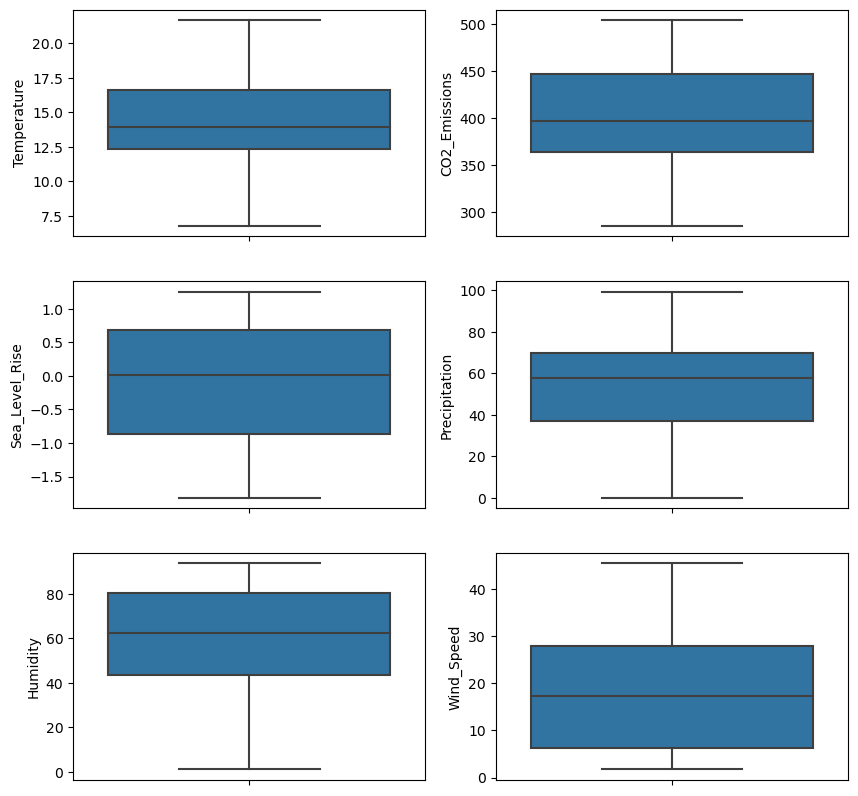

In [73]:
plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
sns.boxplot(data = indiaclimate , y= 'Temperature' )

plt.subplot(3,2,2)
sns.boxplot(data = indiaclimate , y= 'CO2_Emissions')

plt.subplot(3,2,3)
sns.boxplot(data = indiaclimate , y = 'Sea_Level_Rise')
 
plt.subplot(3,2,4)
sns.boxplot(data = indiaclimate , y = 'Precipitation')

plt.subplot(3,2,5)
sns.boxplot ( data = indiaclimate ,y = 'Humidity')

plt.subplot(3,2,6)
sns.boxplot(data = indiaclimate ,y = 'Wind_Speed')
plt.show()

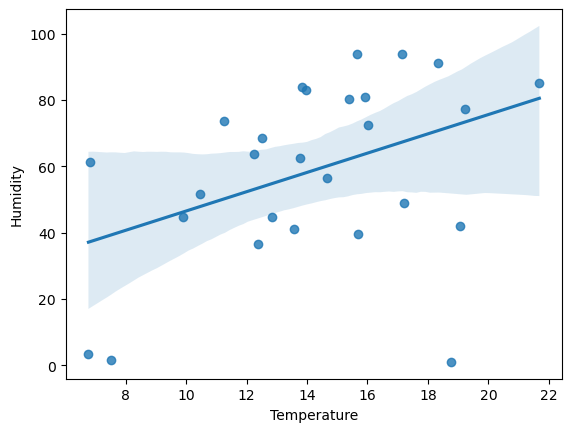

In [93]:
sns.regplot ( data = India_climate , x= 'Temperature' ,y = 'Humidity' )
plt.show()

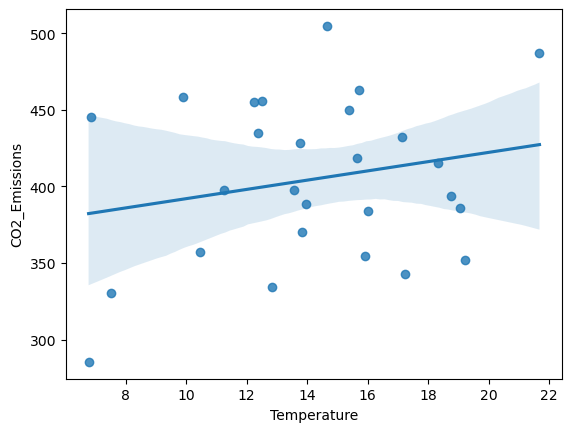

In [88]:
sns.regplot ( data = India_climate , x= 'Temperature' ,y = 'CO2_Emissions' )
plt.show()

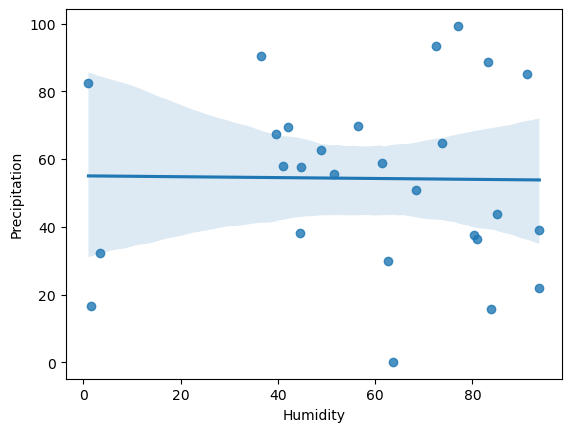

In [87]:
sns.regplot( data = India_climate , x ='Humidity', y ='Precipitation')
plt.show()

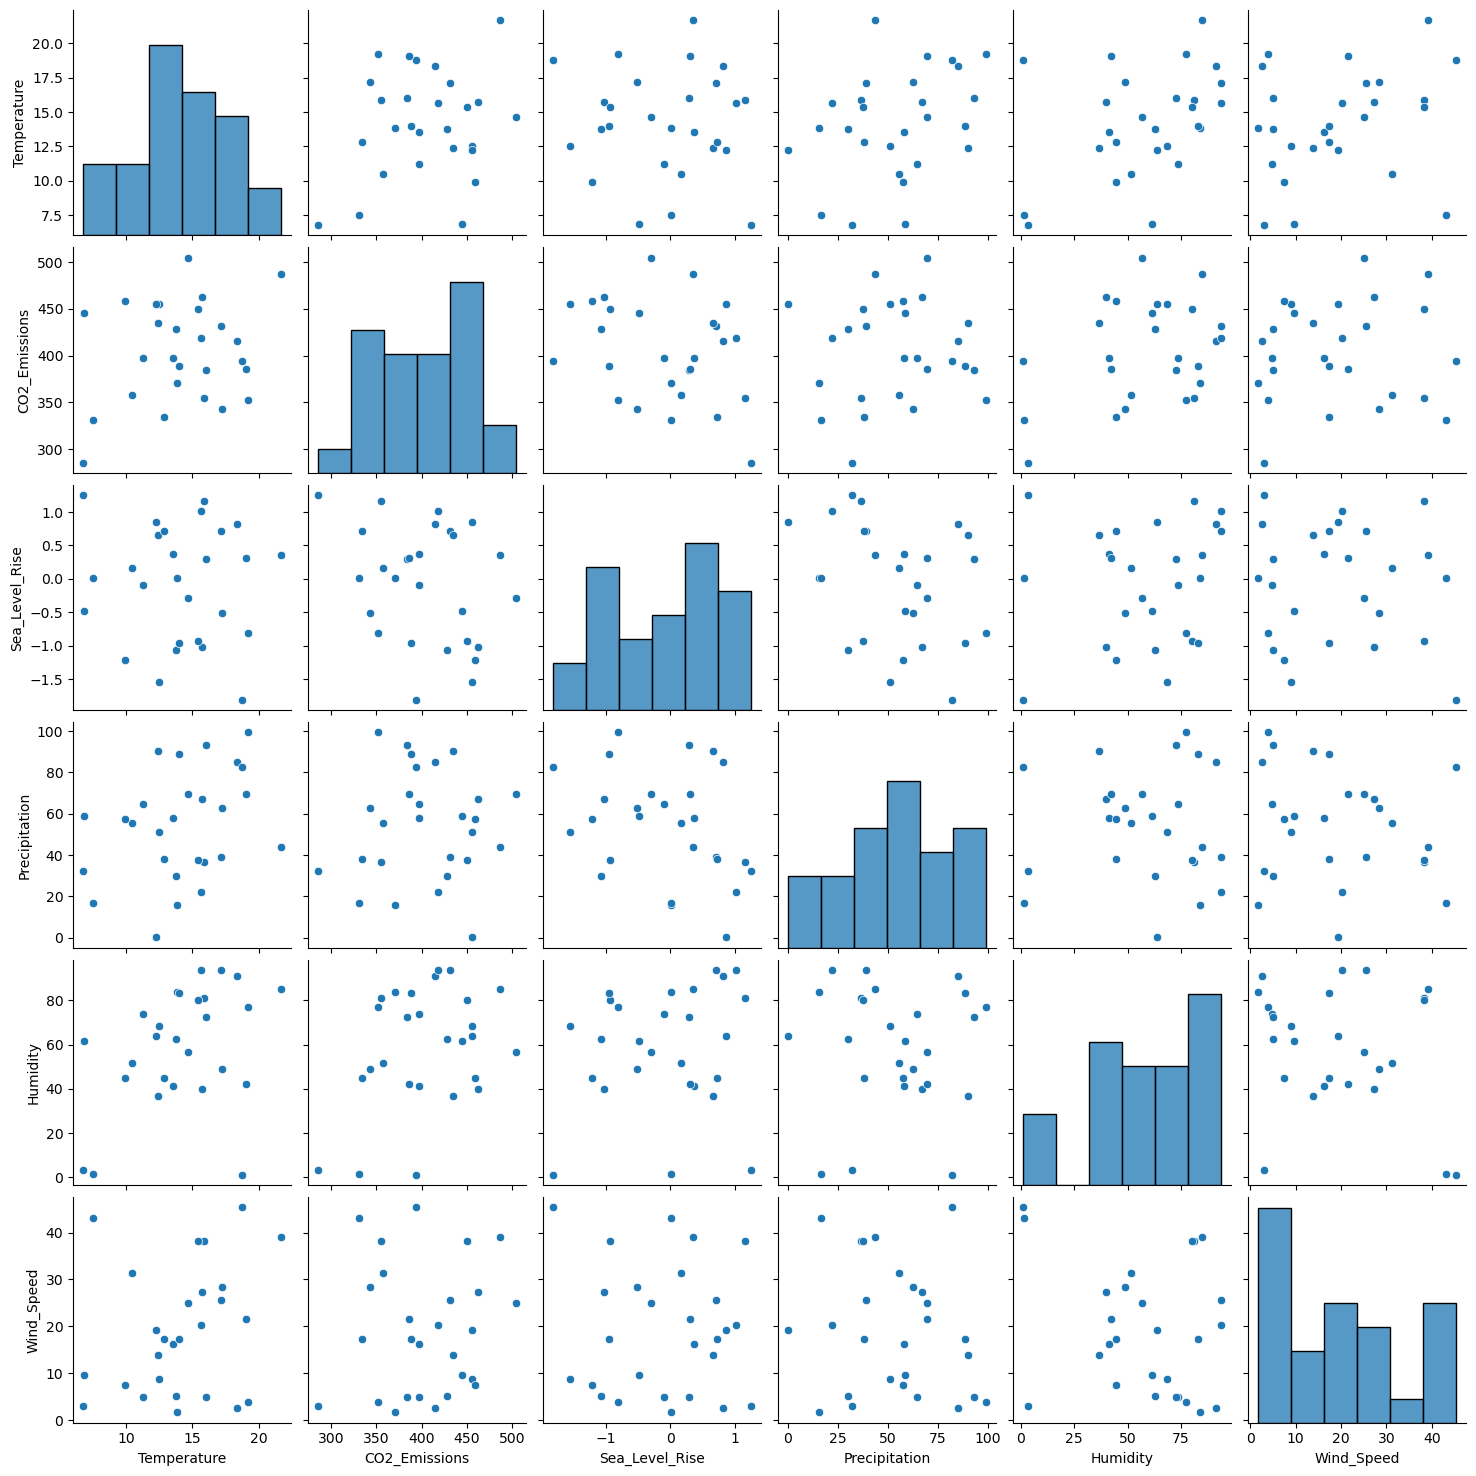

In [97]:
sns.pairplot(data = indiaclimate)
plt.show()

In [83]:
njapan_climate = data.query (" Country =='Japan' & Year >2005")
japanclimate= njapan_climate.drop( columns =['Year', 'Month','Day'])
japanclimate.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2856 to 9487
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            20 non-null     datetime64[ns]
 1   Location        20 non-null     object        
 2   Country         20 non-null     object        
 3   Temperature     20 non-null     float64       
 4   CO2_Emissions   20 non-null     float64       
 5   Sea_Level_Rise  20 non-null     float64       
 6   Precipitation   20 non-null     float64       
 7   Humidity        20 non-null     float64       
 8   Wind_Speed      20 non-null     float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.6+ KB


In [78]:
indiaclimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 2805 to 9713
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            27 non-null     datetime64[ns]
 1   Location        27 non-null     object        
 2   Country         27 non-null     object        
 3   Temperature     27 non-null     float64       
 4   CO2_Emissions   27 non-null     float64       
 5   Sea_Level_Rise  27 non-null     float64       
 6   Precipitation   27 non-null     float64       
 7   Humidity        27 non-null     float64       
 8   Wind_Speed      27 non-null     float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.1+ KB


In [92]:
data.Date.dtype

dtype('<M8[ns]')

#### temperature change in japan over years

In [102]:
Japan_temp_change = data.query ( "Country == 'Japan'" )
Japan_temp_change.sort_values( by = 'Year')

,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day
356,2000-10-26 01:40:39.963996396,Teresaview,Japan,11.028129,482.298542,0.493517,64.619789,45.389843,15.551102,2000,10,26
374,2000-11-10 04:35:38.613861384,North Stephanie,Japan,9.084930,383.554618,1.188128,73.937595,19.293580,0.860746,2000,11,10
518,2001-03-11 03:55:27.812781272,Lake Nicholasshire,Japan,15.944264,329.859262,1.196816,14.773070,12.815146,37.575656,2001,3,11
531,2001-03-22 02:01:50.171017096,New Jeffrey,Japan,16.572954,425.607254,0.165073,39.931406,60.106795,2.515188,2001,3,22
973,2002-03-28 09:38:30.351035096,South Troytown,Japan,12.024541,429.835363,-0.915401,7.355851,77.751984,3.197258,2002,3,28
1340,2003-01-30 17:06:06.156615648,Lake Rachel,Japan,20.327564,320.426044,-1.252456,45.526989,6.164597,3.103747,2003,1,30
1820,2004-03-08 22:52:10.153015296,Morsetown,Japan,7.680148,243.102521,-0.737917,6.035929,63.360612,43.150809,2004,3,8
2010,2004-08-15 13:39:09.234923488,South Chelseaberg,Japan,23.528222,349.780756,-0.580733,94.010968,25.351885,39.865330,2004,8,15
2067,2004-10-02 10:53:14.959495936,Anatown,Japan,7.713490,368.978565,0.058554,0.933342,16.959105,20.564058,2004,10,2
2132,2004-11-26 01:25:06.750675072,South Brandonport,Japan,6.763297,457.003359,-2.274034,78.318496,95.306383,1.949994,2004,11,26


### Temperature change in Japan Over the Years

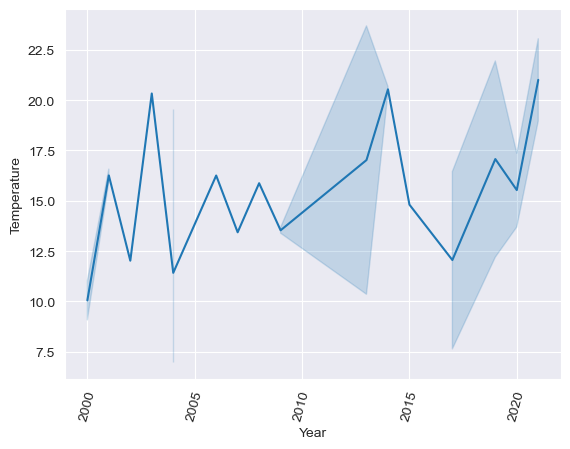

In [132]:
sns.lineplot(data = Japan_temp_change , x= 'Year', y = 'Temperature')
plt.xticks(rotation =75)

plt.show()

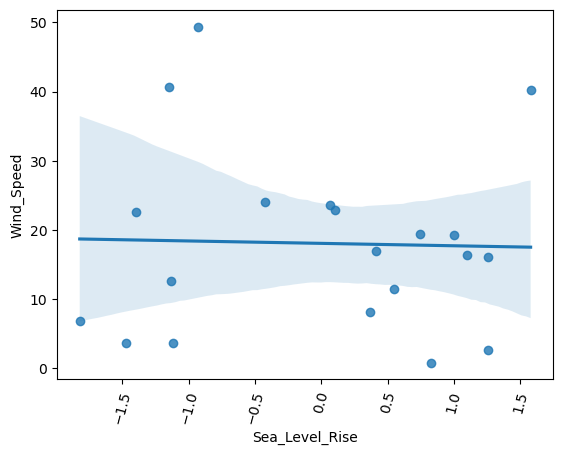

In [124]:
sns.regplot(data = japan_climate , x= 'Sea_Level_Rise', y = 'Wind_Speed')
plt.xticks(rotation = 75 )
plt.show()

#### climate change in china  over the years from 2010

In [144]:
china_co2 = data.query( "Country == 'China' & Year > 2010 " )
china_co2


,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day
5347,2012-04-18 22:18:02.268226816,Ronaldmouth,China,21.890888,389.355717,-1.167045,79.233857,70.284614,40.564946,2012,4,18
6020,2013-11-05 07:20:15.121512128,North Benjaminshire,China,25.145167,455.708043,1.566618,76.669728,4.321727,26.219696,2013,11,5
6742,2015-07-04 20:18:47.632763264,Johnsonport,China,7.591039,398.937379,-0.700131,0.357412,74.765675,2.663705,2015,7,4
7056,2016-03-24 15:11:10.747074688,Lake Mallory,China,12.295184,452.503569,1.320858,14.077288,67.398659,17.851834,2016,3,24
7504,2017-04-04 23:46:10.477047680,Port Amber,China,17.249280,355.777103,1.045221,69.869294,68.440598,8.602141,2017,4,4
7871,2018-02-07 07:13:46.282628224,Lake Jennifer,China,13.315207,374.340686,-0.428779,16.292098,88.150753,19.297515,2018,2,7
7968,2018-04-29 18:56:42.340233984,Port Ninaburgh,China,16.100711,385.057988,-0.009876,84.564226,53.418482,0.075769,2018,4,29
8618,2019-10-27 20:15:20.252025216,South Danielfort,China,16.564809,410.261892,-0.449572,99.798162,23.719387,33.079166,2019,10,27
8862,2020-05-19 19:47:15.283528320,Davisbury,China,12.633614,432.679804,-0.518696,13.463211,25.873355,20.251621,2020,5,19
9021,2020-09-30 09:32:53.357335680,North Chad,China,17.914413,472.100990,1.969749,22.344355,11.671610,33.478002,2020,9,30


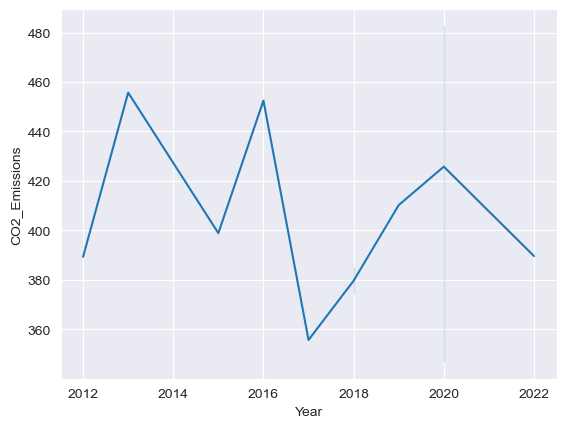

In [145]:
sns.lineplot( data = china_co2 , x = 'Year' , y= 'CO2_Emissions')
plt.show()

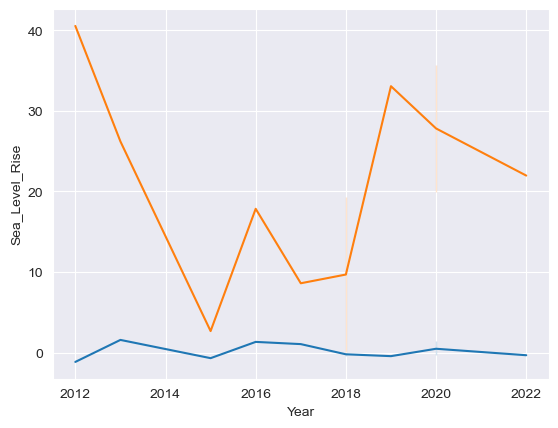

In [156]:

sns.lineplot (data = china_co2 , x ='Year' , y = 'Sea_Level_Rise')

plt.show()


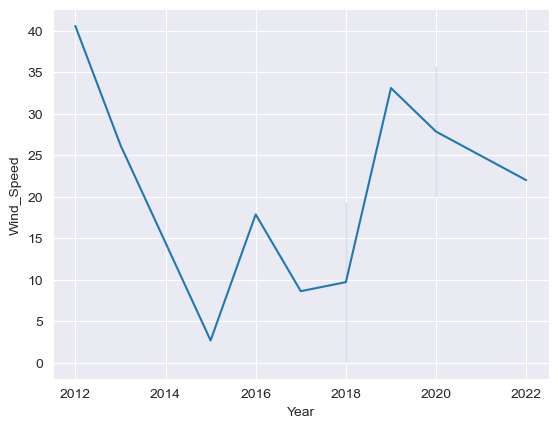

In [158]:
sns.lineplot(data = china_co2 ,x = 'Year' , y = 'Wind_Speed')
plt.show()

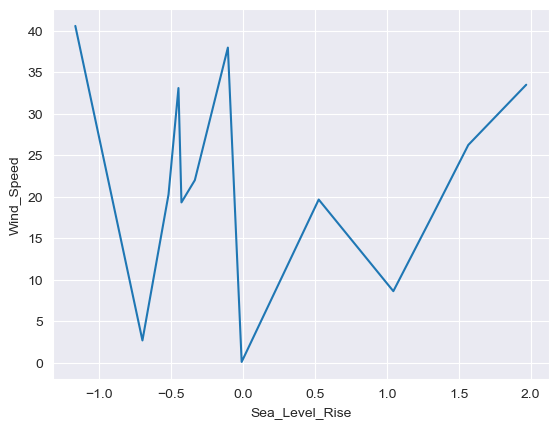

In [160]:
sns.lineplot( data = china_co2 , x = 'Sea_Level_Rise' , y = 'Wind_Speed')
plt.show()

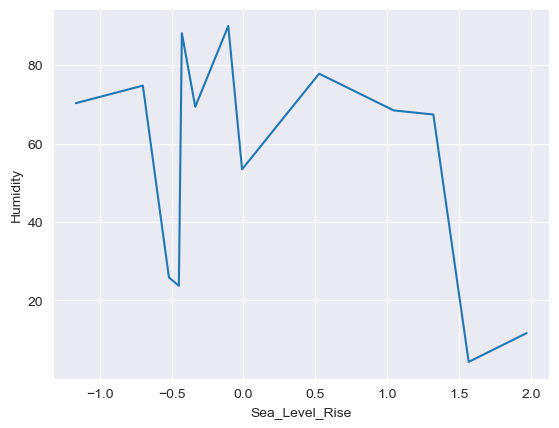

In [161]:
sns.lineplot( data = china_co2 , x = 'Sea_Level_Rise' , y = 'Humidity')
plt.show()

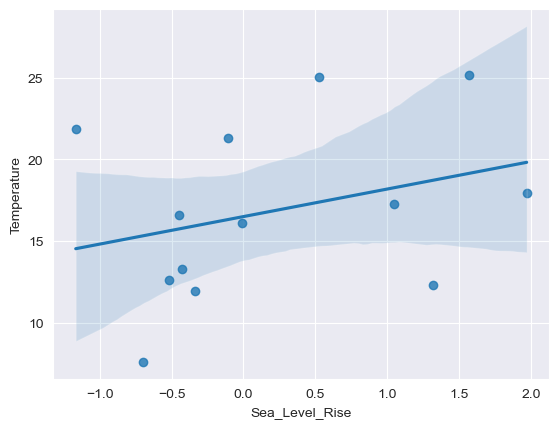

In [165]:
sns.regplot( data = china_co2 , x= 'Sea_Level_Rise', y = 'Temperature')
plt.show()